<a href="https://colab.research.google.com/github/ishankarve/Assignment---Automatic-Ticket-Classification/blob/main/Automatic_Ticket_Classification_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

### Evaluation Rubrics

<table border="1" cellspacing="1" cellpadding="1"><tbody><tr><td><strong>Stage</strong></td><td><strong>Weightage</strong></td><td><strong>Meets Expectations</strong></td></tr><tr><td><meta charset="utf-8"><b id="docs-internal-guid-70363747-7fff-d91c-86fa-d41cc060992e">Data Reading/Data Understanding</b></td><td>5</td><td>The learner has imported the .json data and created the dataframe from it. The learner also has to read the data and make the initial analysis out of it.</td></tr><tr><td><meta charset="utf-8"><b id="docs-internal-guid-25724c20-7fff-dc72-470b-acc12841cb0b">Data Cleaning</b></td><td>10</td><td>The learner has to do the data cleaning operations like filtering text, removing missing values &amp; renaming column headers.</td></tr><tr><td><meta charset="utf-8"><meta charset="utf-8"><b id="docs-internal-guid-777daa65-7fff-549f-c970-6f0ff4f13c47">Data Preprocessing</b></td><td>10</td><td>Data pre-processing steps are done using statistical operations like Lemmatization &amp; POS tagging.</td></tr><tr><td><meta charset="utf-8"><b id="docs-internal-guid-e43ce6a8-7fff-447c-d4a6-1b548029986e">Data Visualisation</b></td><td>10</td><td>The learner has done the visualisation steps for finding the word count distribution &amp; n-gram distribution.</td></tr><tr><td><strong>Feature Extraction</strong></td><td>5</td><td>Features are extracted from the data using Td-Idf.</td></tr><tr><td><strong>Topic Modelling</strong></td><td>25</td><td><p>The learner has used Topic Modelling to do the following:</p><ul><li>Set the best number of clusters to 5.</li><li>Apply&nbsp;the best number to create word clusters.</li><li>Inspect&nbsp;&amp; validate&nbsp;the correction of each cluster for each&nbsp;complaint.</li><li>Map&nbsp;the clusters to topics/cluster names.</li></ul></td></tr><tr><td><meta charset="utf-8"><b id="docs-internal-guid-9f106ca2-7fff-8155-356c-09445982e37f">Model Building</b></td><td>20</td><td>&nbsp;Prepared the train &amp; test data using the labels received from NMF. The learner has to apply at least 2 of these models on the dataset created:<ul><li>Logistic regression</li><li>Decision Tree</li><li>Random Forest</li><li>Naive Bayes (optional)</li></ul><p>Once the models are built the learner has to evaluate their&nbsp;performance using relevant evaluation metrics to select the best model.</p></td></tr><tr><td><strong>Model Inference</strong></td><td>5</td><td>The learner has applied the best model to predict a&nbsp; custom text to see its performance.&nbsp;</td></tr><tr><td><meta charset="utf-8"><b id="docs-internal-guid-424d8c9c-7fff-f592-f73c-ca78ed7cfe77">Code readability and conciseness&nbsp;</b></td><td>10</td><td><p>The learner has done the following:</p><ul><li>Appropriate comments are written wherever applicable.</li><li>Overall, the code is readable&nbsp;and has&nbsp;appropriate indentations.</li></ul></td></tr></tbody></table>


## Importing the necessary libraries

In [1]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [2]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


# Opening JSON file 
# Write the path to your data file and load it 
if IN_COLAB:
  import json,urllib.request
  data = urllib.request.urlopen("https://raw.githubusercontent.com/ishankarve/Assignment---Automatic-Ticket-Classification/main/data/complaints-2021-05-14_08_16.json").read()
  data = json.loads(data)
else:
  data_file_object = open("./data/complaints-2021-05-14_08_16.json")
  # returns JSON object as  
  # a dictionary 
  data = json.load(data_file_object)

df=pd.json_normalize(data)

## Data preparation

In [3]:
# Inspect the dataframe shape
df.shape

(78313, 22)

In [4]:
# Inspect the dataframe to understand the given data.
df.head(5)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [5]:
# get shape of the dataframe
df.shape

(78313, 22)

In [6]:
# check column dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [7]:
# get list of unique variables per column
df.nunique()

_index                                   1
_type                                    1
_id                                  78313
_score                                   1
_source.tags                             3
_source.zip_code                      9442
_source.complaint_id                 78313
_source.issue                          154
_source.date_received                 3444
_source.state                           62
_source.consumer_disputed                3
_source.product                         17
_source.company_response                 8
_source.company                          1
_source.submitted_via                    6
_source.date_sent_to_company          3309
_source.company_public_response          3
_source.sub_product                     72
_source.timely                           2
_source.complaint_what_happened      20931
_source.sub_issue                      205
_source.consumer_consent_provided        5
dtype: int64

In [8]:
# check for columns counts having null values
df.isnull().sum()[df.isnull().sum()>0]

_source.tags                         67413
_source.zip_code                      6757
_source.state                         1991
_source.company_public_response      78309
_source.sub_product                  10571
_source.sub_issue                    46297
_source.consumer_consent_provided     1008
dtype: int64

In [9]:
df.shape

(78313, 22)

In [10]:
#print the column names
print(df.columns.to_list())

['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code', '_source.complaint_id', '_source.issue', '_source.date_received', '_source.state', '_source.consumer_disputed', '_source.product', '_source.company_response', '_source.company', '_source.submitted_via', '_source.date_sent_to_company', '_source.company_public_response', '_source.sub_product', '_source.timely', '_source.complaint_what_happened', '_source.sub_issue', '_source.consumer_consent_provided']


In [11]:
#Assign new column names
df = df.rename(columns=lambda name: name.replace('_', '')) # remove underscores
df = df.rename(columns=lambda name: name.replace('source.', '')) # remove source dot
print(df.columns.to_list())

['index', 'type', 'id', 'score', 'tags', 'zipcode', 'complaintid', 'issue', 'datereceived', 'state', 'consumerdisputed', 'product', 'companyresponse', 'company', 'submittedvia', 'datesenttocompany', 'companypublicresponse', 'subproduct', 'timely', 'complaintwhathappened', 'subissue', 'consumerconsentprovided']


In [12]:
# convert source_datereceived column to a timestamp
df.datereceived = pd.to_datetime(df.datereceived)
df.datesenttocompany = pd.to_datetime(df.datesenttocompany)

In [13]:
# create derived columns/ create new features from timestamp
df['day_received'] = df['datereceived'].dt.day
df['weekday_received'] = df['datereceived'].dt.day_of_week
df['month_received'] =df['datereceived'].dt.month
df['year_received'] = df['datereceived'].dt.year
# df['hour_received'] = df['datereceived'].dt.hour
# df['minute_received'] = df['datereceived'].dt.minute

df['day_senttocompany'] = df['datesenttocompany'].dt.day
df['weekday_senttocompany'] = df['datesenttocompany'].dt.day_of_week
df['month_senttocompany'] =df['datesenttocompany'].dt.month
df['year_senttocompany'] = df['datesenttocompany'].dt.year
# df['hour_senttocompany'] = df['datereceived'].dt.hour
# df['minute_senttocompany'] = df['datesenttocompany'].dt.minute

# make an additional column called response latency
df['response_latency'] = (df['datesenttocompany'] - df['datereceived']).dt.days

In [14]:
df.shape

(78313, 31)

In [15]:
#Assign nan in place of blanks in the complaints column
df['complaintwhathappened'] = df.complaintwhathappened.replace('',np.nan,regex = True)

In [16]:
df.shape[0]

78313

In [17]:
df.complaintwhathappened.isnull().sum()

57241

In [18]:
df.shape[0] - (df.complaintwhathappened.isnull().sum())

21072

In [19]:
#Remove all rows where complaints column is nan
df = df[df['complaintwhathappened'].notnull()]

In [20]:
df.shape

(21072, 31)

In [21]:
df.nunique()[df.nunique()==1]

index                      1
type                       1
score                      1
company                    1
submittedvia               1
companypublicresponse      1
consumerconsentprovided    1
dtype: int64

In [22]:
# drop columns not adding any information value
drop_column_list = df.nunique()[df.nunique()==1].index.tolist()
df=df.drop(columns=drop_column_list, axis = 1)
df.head(2)

,id,tags,zipcode,complaintid,issue,datereceived,state,consumerdisputed,product,companyresponse,...,subissue,day_received,weekday_received,month_received,year_received,day_senttocompany,weekday_senttocompany,month_senttocompany,year_senttocompany,response_latency
1,3229299,Servicemember,319XX,3229299,Written notification about debt,2019-05-01 12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,...,Didn't receive enough information to verify debt,1,2,5,2019,1,2,5,2019,0
2,3199379,None,77069,3199379,"Other features, terms, or problems",2019-04-02 12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,...,Problem with rewards from credit card,2,1,4,2019,2,1,4,2019,0


## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [23]:
# Write your function here to clean the text and remove all the unnecessary elements.

def clean_text(input_text):
    
    clean_text=input_text.lower()
    clean_text = re.sub("\[.*?\]\s*", "", clean_text) # regex pattern to match square brackets
    clean_text = clean_text.translate(str.maketrans('', '', string.punctuation)) # fastest method to remove punctuations
    clean_text = re.sub("\w*\d+\w*\s*", "", clean_text) # remove words containing numbers
    clean_text = re.sub("[X|x]{4,4}", "", clean_text) # remove xxxx.. required later
    # remove additional space from string
    clean_text = re.sub(' +', ' ', clean_text)
    return clean_text

df['complaintwhathappened']=pd.DataFrame(df['complaintwhathappened'].apply(lambda x: clean_text(x)))


In [24]:
df.complaintwhathappened.sample(50)

29813     called my mother who lived in another state a...
5118     this involves chase ink card it all happen bac...
24076    i booked a safari to and with a longtime well ...
41895    briefly a nightmare involving identity theft d...
1497     i would like to file a complaint against chase...
61196    i pay my mortgage to chase via i accidently en...
48086    on i went to chase bank and made a atm cash de...
76828    i signed up for the chase card a year ago and ...
72188    we decided to take advantage of a home equity ...
1238     last year i upgraded my marriott credit card w...
25768    my husband died before he died did filed a bk ...
15475    experian credit reporting agency advertised on...
30919    i have had my account for with this bank for m...
43911    i am a victim of identity theft after reportin...
4054     i opened an account at chase bank back in and ...
43972    hello i am a student who attends the universit...
48821    on approximately i opened a checking account a.

In [25]:
!pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=b3993640f76fc88ca2866f20bff9dd4de60b9e0c003032c6e15c9ac84ad46e49
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [37]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [38]:
#Write your function to Lemmatize the texts
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from stop_words import get_stop_words
from nltk.corpus import stopwords

stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords
stop_words.extend(nltk_words)

wordnet_lemmatizer = WordNetLemmatizer()


def lemmatize_text(text):
        
    tokenised_text = word_tokenize(text)
    non_stop = [w for w in tokenised_text if not w in stop_words] # remove stop words
    lemmatized_list = (wordnet_lemmatizer.lemmatize(w) for w in non_stop)
    return " ".join(lemmatized_list)

In [39]:
df['complaintwhathappened_lemmatized'] = df['complaintwhathappened'].apply(lambda x: lemmatize_text(x))

In [40]:
df['complaintwhathappened_lemmatized'].sample(10)

75638    contacted said company told rent advertise tim...
28384    writing noticed report reflecting late payment...
64900    chase credit card noticed unauthorized charge ...
40582    fraud derogatory account reporting credit repo...
31252    around opened another checking account paychec...
24700    reported jpmcb home lending stating following ...
3608     tried opening account chase bank today gentlem...
75546    letter formal notice cease unauthorized hard i...
8325     chase closed credit card checking account with...
23067    applied chase saphire card credit score card r...
Name: complaintwhathappened_lemmatized, dtype: object

In [41]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = df[['complaintwhathappened', 'complaintwhathappened_lemmatized']]

In [42]:
df_clean

,complaintwhathappened,complaintwhathappened_lemmatized
1,good morning my name is and i appreciate it if...,good morning name appreciate help put stop cha...
2,i upgraded my card in and was told by the agen...,upgraded card told agent upgrade anniversary d...
10,chase card was reported on however fraudulent ...,chase card reported however fraudulent applica...
11,on while trying to book a ticket i came across...,trying book ticket came across offer applied t...
14,my grand son give me check for i deposit it in...,grand son give check deposit chase account fun...
...,...,...
78303,after being a chase card customer for well ove...,chase card customer well decade offered multip...
78309,on wednesday i called chas my visa credit card...,wednesday called chas visa credit card provide...
78310,i am not familiar with pay and did not underst...,familiar pay understand great risk provides co...
78311,i have had flawless credit for yrs ive had cha...,flawless credit yr ive chase credit card chase...


In [43]:
#Write your function to extract the POS tags 
nltk.download('averaged_perceptron_tagger')
def pos_tag(text):
    # write your code here
    output=[]
    tok_text = word_tokenize(text)
    tok_text_pos = nltk.pos_tag(tok_text)
    # iterarate through the list and keep only NN tags
    for tup in tok_text_pos:
        if tup[1] == 'NN':
            output.append(tup[0])
    return " ".join(output)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [44]:
#this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].
df_clean['complaint_POS_removed'] = df_clean['complaintwhathappened_lemmatized'].apply(lambda x: pos_tag(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df_clean = df_clean.reset_index(drop=True)

In [46]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaintwhathappened,complaintwhathappened_lemmatized,complaint_POS_removed
0,good morning my name is and i appreciate it if...,good morning name appreciate help put stop cha...,morning name appreciate help chase bank cardme...
1,i upgraded my card in and was told by the agen...,upgraded card told agent upgrade anniversary d...,card agent date change information order upgra...
2,chase card was reported on however fraudulent ...,chase card reported however fraudulent applica...,chase card application identity consent servic...
3,on while trying to book a ticket i came across...,trying book ticket came across offer applied t...,book ticket offer ticket card information offe...
4,my grand son give me check for i deposit it in...,grand son give check deposit chase account fun...,son check deposit chase account fund chase ban...
...,...,...,...
21067,after being a chase card customer for well ove...,chase card customer well decade offered multip...,chase card customer decade solicitation credit...
21068,on wednesday i called chas my visa credit card...,wednesday called chas visa credit card provide...,wednesday chas visa credit card provider claim...
21069,i am not familiar with pay and did not underst...,familiar pay understand great risk provides co...,pay risk consumer chase bank chase year trust ...
21070,i have had flawless credit for yrs ive had cha...,flawless credit yr ive chase credit card chase...,flawless credit chase credit card chase freedo...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




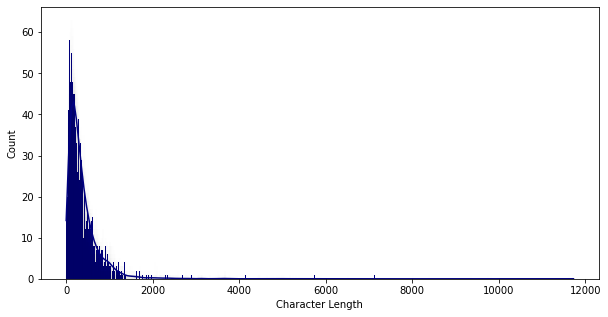

In [47]:
# Write your code here to visualise the data according to the 'Complaint' character length
ty_df = df_clean['complaint_POS_removed'].str.len()
# Plot histogram
plt.figure(1, figsize=(10,5))
sns.histplot(data = ty_df
            ,color = 'navy'
            ,alpha = 1
            ,binwidth = 1
            ,kde = True #kernel density estimate
            )

plt.xlabel("Character Length")

plt.show()

#### Find the top 40 words by frequency among all the articles after processing the text.

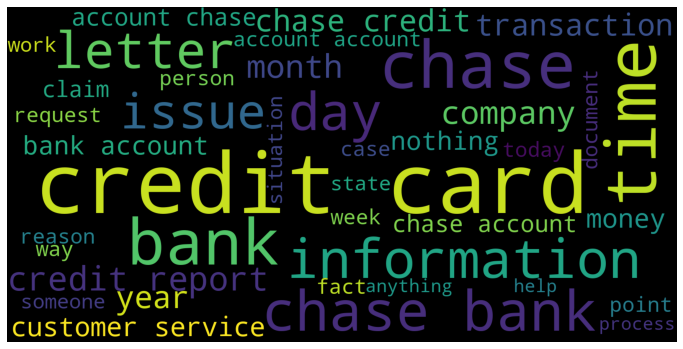

In [48]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
collated_text_list = df_clean['complaint_POS_removed'].tolist()
collated_text = " ".join(collated_text_list)
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black",max_words=40).generate(collated_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [49]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [50]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english',ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_clean['Complaint_clean'].values.astype('U'), 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the Complaint text after removing stop words and lemmatization"))
fig.show()


In [51]:
#Print the top 10 words in the unigram frequency
df2.head(10)

,unigram,count
0,chase,52723
1,account,45034
2,credit,33100
3,bank,28245
4,card,26872
5,payment,21171
6,time,16042
7,charge,13029
8,day,12988
9,money,11961


In [52]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_bigram(corpus, n=None):
    vec=CountVectorizer(stop_words='english',ngram_range=(2, 2)).fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True )
    return words_freq[:n]

common_words=get_top_n_bigram(df_clean['Complaint_clean'].values.astype('U'),30)
df3=pd.DataFrame(common_words,columns=['bigram', 'count'])

fig=go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text='Top 30 bigram in the Complaint text after removing stop words and lemmatization')) 
fig.show()

In [53]:
#Print the top 10 words in the bigram frequency
df3.head(10)

,bigram,count
0,credit card,12743
1,chase bank,5225
2,credit report,3898
3,chase credit,3165
4,customer service,3090
5,bank account,2933
6,chase account,2873
7,account chase,2800
8,account account,2769
9,account bank,1822


In [54]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_bigram(corpus, n=None):
    vec=CountVectorizer(stop_words='english',ngram_range=(3, 3)).fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True )
    return words_freq[:n]

common_words=get_top_n_bigram(df_clean['Complaint_clean'].values.astype('U'),30)
df4=pd.DataFrame(common_words,columns=['bigram', 'count'])

fig=go.Figure([go.Bar(x=df4['bigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text='Top 30 trigram in the Complaint text after removing stop words and lemmatization')) 
fig.show()

In [55]:
#Print the top 10 words in the trigram frequency
df4.head(10)

,bigram,count
0,chase credit card,2122
1,credit card account,1076
2,credit card company,1013
3,credit card chase,779
4,credit card credit,588
5,chase bank account,454
6,inquiry credit report,432
7,charge credit card,430
8,account credit card,429
9,card credit card,424


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [56]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [57]:
#All masked texts has been removed
df_clean

,complaintwhathappened,complaintwhathappened_lemmatized,complaint_POS_removed,Complaint_clean
0,good morning my name is and i appreciate it if...,good morning name appreciate help put stop cha...,morning name appreciate help chase bank cardme...,morning name appreciate help chase bank cardme...
1,i upgraded my card in and was told by the agen...,upgraded card told agent upgrade anniversary d...,card agent date change information order upgra...,card agent date change information order upgra...
2,chase card was reported on however fraudulent ...,chase card reported however fraudulent applica...,chase card application identity consent servic...,chase card application identity consent servic...
3,on while trying to book a ticket i came across...,trying book ticket came across offer applied t...,book ticket offer ticket card information offe...,book ticket offer ticket card information offe...
4,my grand son give me check for i deposit it in...,grand son give check deposit chase account fun...,son check deposit chase account fund chase ban...,son check deposit chase account fund chase ban...
...,...,...,...,...
21067,after being a chase card customer for well ove...,chase card customer well decade offered multip...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...
21068,on wednesday i called chas my visa credit card...,wednesday called chas visa credit card provide...,wednesday chas visa credit card provider claim...,wednesday chas visa credit card provider claim...
21069,i am not familiar with pay and did not underst...,familiar pay understand great risk provides co...,pay risk consumer chase bank chase year trust ...,pay risk consumer chase bank chase year trust ...
21070,i have had flawless credit for yrs ive had cha...,flawless credit yr ive chase credit card chase...,flawless credit chase credit card chase freedo...,flawless credit chase credit card chase freedo...


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [58]:
#Write your code here to initialise the TfidfVectorizer 
vectorizer = TfidfVectorizer(analyzer='word', stop_words= 'english', max_df=0.95, min_df=2)

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [59]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
input_matrix = vectorizer.fit_transform(df_clean['Complaint_clean'].values)

In [60]:
pd.DataFrame(input_matrix.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,aa,aarp,ab,abandonment,abatement,abbreviation,abd,abet,abhorrent,abide,...,youth,youve,yr,ytd,zero,zeroed,zip,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [61]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [62]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 #write the value you want to test out

#keep the random_state =40
nmf = NMF(n_components=num_topics, random_state=40) #write your code here

In [63]:
W = nmf.fit_transform(input_matrix)
H = nmf.components_       # Topic-term matrix
len(vectorizer.get_feature_names_out())

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



6983

In [64]:
#Print the Top15 words for each of the topics
n_top = 15
words = np.array(vectorizer.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, n_top)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(n_top)]).astype(str)
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:n_top]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,bank,check,money,chase,fund,deposit,day,branch,number,business,transaction,transfer,customer,claim
Topic 2,credit,card,report,inquiry,chase,account,company,score,bureau,limit,debt,information,application,letter,balance
Topic 3,loan,mortgage,home,chase,modification,property,year,rate,letter,time,bank,house,foreclosure,sale,document
Topic 4,charge,card,chase,transaction,dispute,fraud,fee,merchant,claim,purchase,service,time,statement,refund,company
Topic 5,payment,balance,month,fee,statement,pay,day,time,chase,auto,date,year,credit,mortgage,car


In [65]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

topic_map = {
    'Topic 1' : 0,
    'Topic 2' : 1,
    'Topic 3' : 2,
    'Topic 4' : 3,
    'Topic 5' : 4,
    'Topic 6' : 5
}


In [66]:
#Assign the best topic to each of the cmplaints in Topic Column
W = pd.DataFrame(W, columns=[f'Topic {i + 1}' for i in range(num_topics)])

# df_clean['Topic'] = W.apply(lambda x: topic_map.get(x.idxmax()), axis=1) #write your code to assign topics to each rows.
df_clean['Topic'] = W.apply(lambda x: topic_map.get(x.idxmax()) if x.idxmax() in topic_map.keys() else len(topic_map), axis=1)


In [67]:
df_clean.head()

,complaintwhathappened,complaintwhathappened_lemmatized,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is and i appreciate it if...,good morning name appreciate help put stop cha...,morning name appreciate help chase bank cardme...,morning name appreciate help chase bank cardme...,0
1,i upgraded my card in and was told by the agen...,upgraded card told agent upgrade anniversary d...,card agent date change information order upgra...,card agent date change information order upgra...,1
2,chase card was reported on however fraudulent ...,chase card reported however fraudulent applica...,chase card application identity consent servic...,chase card application identity consent servic...,1
3,on while trying to book a ticket i came across...,trying book ticket came across offer applied t...,book ticket offer ticket card information offe...,book ticket offer ticket card information offe...,1
4,my grand son give me check for i deposit it in...,grand son give check deposit chase account fun...,son check deposit chase account fund chase ban...,son check deposit chase account fund chase ban...,0


In [68]:
df_clean.shape

(21072, 5)

In [69]:
#Print the first 5 Complaint for each of the Topics
df6=df_clean.groupby('Topic').head(5)
df6.sort_values('Topic')

,complaintwhathappened,complaintwhathappened_lemmatized,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is and i appreciate it if...,good morning name appreciate help put stop cha...,morning name appreciate help chase bank cardme...,morning name appreciate help chase bank cardme...,0
4,my grand son give me check for i deposit it in...,grand son give check deposit chase account fun...,son check deposit chase account fund chase ban...,son check deposit chase account fund chase ban...,0
6,with out notice jp morgan chase restricted my ...,notice jp morgan chase restricted account debi...,jp chase account debit card tuesday branch cus...,jp chase account debit card tuesday branch cus...,0
10,mishandling of this account by chase auto and,mishandling account chase auto,account auto,account auto,0
12,i opened an account with chase bank on and use...,opened account chase bank used code bonus call...,account bank code bonus term everything accoun...,account bank code bonus term everything accoun...,0
1,i upgraded my card in and was told by the agen...,upgraded card told agent upgrade anniversary d...,card agent date change information order upgra...,card agent date change information order upgra...,1
2,chase card was reported on however fraudulent ...,chase card reported however fraudulent applica...,chase card application identity consent servic...,chase card application identity consent servic...,1
3,on while trying to book a ticket i came across...,trying book ticket came across offer applied t...,book ticket offer ticket card information offe...,book ticket offer ticket card information offe...,1
5,can you please remove inquiry,please remove inquiry,inquiry,inquiry,1
9,i have a chase credit card which is incorrectl...,chase credit card incorrectly reporting data c...,chase credit card credit report company issue,chase credit card credit report company issue,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [70]:
#Create the dictionary of Topic names and Topics

Topic_names = { 
                0 : "Bank account services",
                1 : "Credit Card/Prepaid Card",
                2 : "Mortgages/loans",
                3 : "Theft/Dispute reporting",
                4 : "Others"
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [71]:
df_clean

,complaintwhathappened,complaintwhathappened_lemmatized,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is and i appreciate it if...,good morning name appreciate help put stop cha...,morning name appreciate help chase bank cardme...,morning name appreciate help chase bank cardme...,Bank account services
1,i upgraded my card in and was told by the agen...,upgraded card told agent upgrade anniversary d...,card agent date change information order upgra...,card agent date change information order upgra...,Credit Card/Prepaid Card
2,chase card was reported on however fraudulent ...,chase card reported however fraudulent applica...,chase card application identity consent servic...,chase card application identity consent servic...,Credit Card/Prepaid Card
3,on while trying to book a ticket i came across...,trying book ticket came across offer applied t...,book ticket offer ticket card information offe...,book ticket offer ticket card information offe...,Credit Card/Prepaid Card
4,my grand son give me check for i deposit it in...,grand son give check deposit chase account fun...,son check deposit chase account fund chase ban...,son check deposit chase account fund chase ban...,Bank account services
...,...,...,...,...,...
21067,after being a chase card customer for well ove...,chase card customer well decade offered multip...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...,Credit Card/Prepaid Card
21068,on wednesday i called chas my visa credit card...,wednesday called chas visa credit card provide...,wednesday chas visa credit card provider claim...,wednesday chas visa credit card provider claim...,Theft/Dispute reporting
21069,i am not familiar with pay and did not underst...,familiar pay understand great risk provides co...,pay risk consumer chase bank chase year trust ...,pay risk consumer chase bank chase year trust ...,Theft/Dispute reporting
21070,i have had flawless credit for yrs ive had cha...,flawless credit yr ive chase credit card chase...,flawless credit chase credit card chase freedo...,flawless credit chase credit card chase freedo...,Others


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [72]:
#Create the dictionary again of Topic names and Topics

Topic_names = { 
                "Bank account services":0
                ,"Credit Card/Prepaid Card":1
                ,"Mortgages/loans":2
                ,"Theft/Dispute reporting":3
                ,"Others":4
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [73]:
df_clean

,complaintwhathappened,complaintwhathappened_lemmatized,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is and i appreciate it if...,good morning name appreciate help put stop cha...,morning name appreciate help chase bank cardme...,morning name appreciate help chase bank cardme...,0
1,i upgraded my card in and was told by the agen...,upgraded card told agent upgrade anniversary d...,card agent date change information order upgra...,card agent date change information order upgra...,1
2,chase card was reported on however fraudulent ...,chase card reported however fraudulent applica...,chase card application identity consent servic...,chase card application identity consent servic...,1
3,on while trying to book a ticket i came across...,trying book ticket came across offer applied t...,book ticket offer ticket card information offe...,book ticket offer ticket card information offe...,1
4,my grand son give me check for i deposit it in...,grand son give check deposit chase account fun...,son check deposit chase account fund chase ban...,son check deposit chase account fund chase ban...,0
...,...,...,...,...,...
21067,after being a chase card customer for well ove...,chase card customer well decade offered multip...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...,1
21068,on wednesday i called chas my visa credit card...,wednesday called chas visa credit card provide...,wednesday chas visa credit card provider claim...,wednesday chas visa credit card provider claim...,3
21069,i am not familiar with pay and did not underst...,familiar pay understand great risk provides co...,pay risk consumer chase bank chase year trust ...,pay risk consumer chase bank chase year trust ...,3
21070,i have had flawless credit for yrs ive had cha...,flawless credit yr ive chase credit card chase...,flawless credit chase credit card chase freedo...,flawless credit chase credit card chase freedo...,4


In [74]:
df_clean.shape

(21072, 5)

In [75]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data= df_clean[["complaintwhathappened","Topic"]]

In [76]:
training_data

,complaintwhathappened,Topic
0,good morning my name is and i appreciate it if...,0
1,i upgraded my card in and was told by the agen...,1
2,chase card was reported on however fraudulent ...,1
3,on while trying to book a ticket i came across...,1
4,my grand son give me check for i deposit it in...,0
...,...,...
21067,after being a chase card customer for well ove...,1
21068,on wednesday i called chas my visa credit card...,3
21069,i am not familiar with pay and did not underst...,3
21070,i have had flawless credit for yrs ive had cha...,4


####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


#### Prepare dataset for regression and ensemble model evaluation

In [77]:
# vectorise the training data set to convert it to numbers
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer(ngram_range=(1,3), stop_words='english', max_df=0.95, min_df=0.02) # ngram undertaken to reduce memory footprint
input_matrix = vectorizer.fit_transform(training_data['complaintwhathappened'])

In [78]:
training_data.shape

(21072, 2)

In [79]:
input_matrix.shape

(21072, 761)

In [80]:
tfidf_transformer =TfidfTransformer(use_idf=True).fit(input_matrix)
vectorzed_words = tfidf_transformer.transform(input_matrix)
vectorzed_words.shape

(21072, 761)

In [81]:
# create a dataframe from a sparse matrix
vectorzed_words_df = pd.DataFrame(vectorzed_words.toarray(),columns=vectorizer.get_feature_names_out(),index=training_data.index)

In [82]:
vectorzed_words_df["Topic"] = training_data["Topic"]

In [83]:
from sklearn.model_selection import train_test_split

X= vectorzed_words_df.drop(['Topic'], axis=1)
y= vectorzed_words_df['Topic']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=40, stratify=y)

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

### Logistic Regression

In [ ]:
# Write your code here to build any 3 models and evaluate them using the required metrics
# Grid search cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform


# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

# define search
search = RandomizedSearchCV(model, space, n_iter=5, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)